In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
df = pd.read_csv(url)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport
from sklearn import tree

In [2]:
ProfileReport(df)

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [5]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   NaN        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   NaN        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [8]:
x  = df.drop(['Survived','PassengerId','Embarked','Name','Cabin','Ticket'],axis =1)

In [9]:
x

Pclass     Sex        Age  SibSp  Parch     Fare
0         3    male  22.000000      1      0   7.2500
1         1  female  38.000000      1      0  71.2833
2         3  female  26.000000      0      0   7.9250
3         1  female  35.000000      1      0  53.1000
4         3    male  35.000000      0      0   8.0500
..      ...     ...        ...    ...    ...      ...
886       2    male  27.000000      0      0  13.0000
887       1  female  19.000000      0      0  30.0000
888       3  female  29.699118      1      2  23.4500
889       1    male  26.000000      0      0  30.0000
890       3    male  32.000000      0      0   7.7500

[891 rows x 6 columns]

In [10]:
x.describe()

Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   13.002015    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000   29.699118    0.000000    0.000000   14.454200
75%      3.000000   35.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [11]:
y = df['Survived']

In [12]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
lbe_enc = LabelEncoder()

In [14]:
x['label_enco'] = lbe_enc.fit_transform(df['Sex'])

In [15]:
x.drop(['Sex'],axis =1,inplace=True)

In [16]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .20,random_state =30) 

In [17]:
dec_tree = DecisionTreeClassifier()

In [18]:
dec_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [19]:
x

Pclass        Age  SibSp  Parch     Fare  label_enco
0         3  22.000000      1      0   7.2500           1
1         1  38.000000      1      0  71.2833           0
2         3  26.000000      0      0   7.9250           0
3         1  35.000000      1      0  53.1000           0
4         3  35.000000      0      0   8.0500           1
..      ...        ...    ...    ...      ...         ...
886       2  27.000000      0      0  13.0000           1
887       1  19.000000      0      0  30.0000           0
888       3  29.699118      1      2  23.4500           0
889       1  26.000000      0      0  30.0000           1
890       3  32.000000      0      0   7.7500           1

[891 rows x 6 columns]

In [20]:
dec_tree.score(train_x,train_y)

0.9873595505617978

In [21]:
dec_tree.score(test_x,test_y)

0.770949720670391

In [22]:
dec_tree.predict([[1,17.000000,1,0,108.900,0]])

array([1], dtype=int64)

In [23]:
test_x

Pclass        Age  SibSp  Parch     Fare  label_enco
417       2  18.000000      0      2   13.000           0
307       1  17.000000      1      0  108.900           0
87        3  29.699118      0      0    8.050           1
577       1  39.000000      1      0   55.900           0
684       2  60.000000      1      1   39.000           1
..      ...        ...    ...    ...      ...         ...
368       3  29.699118      0      0    7.750           0
851       3  74.000000      0      0    7.775           1
501       3  21.000000      0      0    7.750           0
520       1  30.000000      0      0   93.500           0
40        3  40.000000      1      0    9.475           0

[179 rows x 6 columns]

In [24]:
test_y

417    1
307    1
87     0
577    1
684    0
      ..
368    1
851    0
501    0
520    1
40     0
Name: Survived, Length: 179, dtype: int64

In [25]:
path  =  dec_tree.cost_complexity_pruning_path(train_x,train_y)

In [26]:
ccp_alpha = path.ccp_alphas

In [27]:
ccp_alpha

array([0.00000000e+00, 0.00000000e+00, 6.68806849e-05, 1.60513644e-04,
       1.70759195e-04, 1.85208050e-04, 3.67843767e-04, 4.46884576e-04,
       4.65687732e-04, 4.68164794e-04, 6.83267537e-04, 8.42696629e-04,
       8.98876404e-04, 9.07610996e-04, 9.24769963e-04, 9.36329588e-04,
       9.36329588e-04, 9.36329588e-04, 9.36329588e-04, 9.36329588e-04,
       9.36329588e-04, 9.36329588e-04, 9.36329588e-04, 9.72342264e-04,
       1.00655431e-03, 1.02996255e-03, 1.03256346e-03, 1.04926408e-03,
       1.05337079e-03, 1.05337079e-03, 1.11189139e-03, 1.12359551e-03,
       1.13439931e-03, 1.18841832e-03, 1.22893258e-03, 1.24843945e-03,
       1.24843945e-03, 1.25127681e-03, 1.28676873e-03, 1.30234934e-03,
       1.40449438e-03, 1.40449438e-03, 1.49812734e-03, 1.50661530e-03,
       1.58005618e-03, 1.62915551e-03, 1.65234633e-03, 1.72369765e-03,
       1.80422288e-03, 1.87265918e-03, 1.88101926e-03, 2.02297155e-03,
       2.24719101e-03, 2.24719101e-03, 2.34082397e-03, 2.47851950e-03,
      

In [28]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(train_x,train_y)
    dt_model2.append(dt_m)

In [29]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=6.688068485821317e-05),
 DecisionTreeClassifier(ccp_alpha=0.00016051364365971205),
 DecisionTreeClassifier(ccp_alpha=0.00017075919538267243),
 DecisionTreeClassifier(ccp_alpha=0.0001852080503765884),
 DecisionTreeClassifier(ccp_alpha=0.0003678437667201716),
 DecisionTreeClassifier(ccp_alpha=0.00044688457609805927),
 DecisionTreeClassifier(ccp_alpha=0.0004656877316053338),
 DecisionTreeClassifier(ccp_alpha=0.0004681647940074905),
 DecisionTreeClassifier(ccp_alpha=0.0006832675372001222),
 DecisionTreeClassifier(ccp_alpha=0.0008426966292134834),
 DecisionTreeClassifier(ccp_alpha=0.0008988764044943818),
 DecisionTreeClassifier(ccp_alpha=0.0009076109960642593),
 DecisionTreeClassifier(ccp_alpha=0.0009247699634715873),
 DecisionTreeClassifier(ccp_alpha=0.0009363295880149812),
 DecisionTreeClassifier(ccp_alpha=0.0009363295880149812),
 DecisionTreeClassifier(ccp_alpha=0.0009363295880149812),
 DecisionTreeCl

In [30]:
train_score = [i.score(train_x,train_y) for i in dt_model2]

In [31]:
test_score  = [i.score(test_x,test_y) for i in dt_model2]

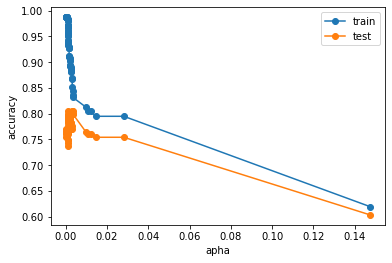

In [32]:
fix,ax = plt.subplots()
ax.set_xlabel("apha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alpha,train_score,marker = 'o',label = 'train')
ax.plot(ccp_alpha,test_score,marker = 'o',label = 'test')
ax.legend()

In [33]:
new_model = DecisionTreeClassifier(ccp_alpha=0.009)

In [34]:
new_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.009)

In [35]:
new_model.score(train_x,train_y)

0.8314606741573034

In [36]:
new_model.score(test_x,test_y)

0.7988826815642458

In [37]:
param = {
           'criterion' : ['gini','entropy'], ## One is the gini impurity and another one is entropy low and Information gain is high
           'splitter' : ['best'], ## when this parameter is fixed to best it will calculate the criterion on each feature and and give the best feature for splitting nodes and if it is RANDOM it will use random features fro splitting
           'max_depth' : range(10),# specify upto which the tree branch to be splitted if it is default none it will go upto every tree pure split
           'min_samples_leaf':range(1,5),
           'min_samples_split':range(1,10)
             }

In [38]:
grid = GridSearchCV(dec_tree,param_grid=param,cv=10,n_jobs=2,verbose=3)

In [39]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


C:\Users\saire\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393
 0.79491393 0.79491393 0.79491393        nan 0.79491393 0.79491393
 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393
        nan 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393
 0.79491393 0.79491393 0.79491393        nan 0.79491393 0.79491393
 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393 0.79491393
        nan 0.78789124 0.78789124 0.78789124 0.787891

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best']},
             verbose=3)

In [40]:
grid_pa = grid.best_params_

In [41]:
grid_pa

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [42]:
grid.best_score_

0.8216549295774648

In [43]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
new_model_tuning = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 3,
 min_samples_leaf = 1,
 min_samples_split = 2,
 splitter= 'best',
  ccp_alpha=0.009)

In [45]:
new_model_tuning.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=3)

In [46]:
new_model_tuning.score(train_x,train_y)

0.8356741573033708

In [47]:
new_model_tuning.score(test_x,test_y)

0.7988826815642458

In [48]:
!pip show numpy

Name: numpy
Version: 1.19.2
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\saire\anaconda3\lib\site-packages
Requires: 
Required-by: xgboost, xarray, wordcloud, visions, tifffile, tensorflow, tensorboard, tables, sweetviz, statsmodels, seaborn, scipy, scikit-learn, scikit-image, PyWavelets, phik, patsy, pandas, pandas-profiling, optuna, opt-einsum, opencv-python, numexpr, numba, mkl-random, mkl-fft, missingno, matplotlib, Keras, Keras-Preprocessing, imageio, ImageHash, h5py, dtale, dataprep, cufflinks, cmaes, Bottleneck, bokeh, bkcharts, astropy, altair


In [49]:
test_x

Pclass        Age  SibSp  Parch     Fare  label_enco
417       2  18.000000      0      2   13.000           0
307       1  17.000000      1      0  108.900           0
87        3  29.699118      0      0    8.050           1
577       1  39.000000      1      0   55.900           0
684       2  60.000000      1      1   39.000           1
..      ...        ...    ...    ...      ...         ...
368       3  29.699118      0      0    7.750           0
851       3  74.000000      0      0    7.775           1
501       3  21.000000      0      0    7.750           0
520       1  30.000000      0      0   93.500           0
40        3  40.000000      1      0    9.475           0

[179 rows x 6 columns]

In [50]:
test_y

417    1
307    1
87     0
577    1
684    0
      ..
368    1
851    0
501    0
520    1
40     0
Name: Survived, Length: 179, dtype: int64

[Text(113.18698158199832, 212.91, 'X[5] <= 0.5\ngini = 0.471\nsamples = 712\nvalue = [441, 271]'),
 Text(59.52862563237775, 203.85, 'X[0] <= 2.5\ngini = 0.374\nsamples = 249\nvalue = [62, 187]'),
 Text(25.97099494097808, 194.79, 'X[1] <= 2.5\ngini = 0.124\nsamples = 136\nvalue = [9, 127]'),
 Text(20.32512647554806, 185.73, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(18.066779089376055, 176.67, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(22.58347386172007, 176.67, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(31.616863406408097, 185.73, 'X[4] <= 28.856\ngini = 0.112\nsamples = 134\nvalue = [8, 126]'),
 Text(27.100168634064083, 176.67, 'X[4] <= 28.231\ngini = 0.229\nsamples = 53\nvalue = [7, 46]'),
 Text(24.841821247892078, 167.60999999999999, 'X[1] <= 56.0\ngini = 0.204\nsamples = 52\nvalue = [6, 46]'),
 Text(18.066779089376055, 158.55, 'X[2] <= 0.5\ngini = 0.18\nsamples = 50\nvalue = [5, 45]'),
 Text(11.291736930860035, 149.49, 'X[4] <= 13.25\ngini = 0.111\

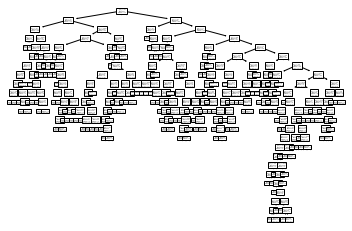

In [51]:
tree.plot_tree(dec_tree)

[Text(141.64615384615385, 190.26, 'X[5] <= 0.5\nentropy = 0.958\nsamples = 712\nvalue = [441, 271]'),
 Text(51.50769230769231, 135.9, 'X[0] <= 2.5\nentropy = 0.81\nsamples = 249\nvalue = [62, 187]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.351\nsamples = 136\nvalue = [9, 127]'),
 Text(77.26153846153846, 81.53999999999999, 'X[4] <= 24.808\nentropy = 0.997\nsamples = 113\nvalue = [53, 60]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.968\nsamples = 96\nvalue = [38, 58]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(231.7846153846154, 135.9, 'X[1] <= 9.5\nentropy = 0.683\nsamples = 463\nvalue = [379, 84]'),
 Text(180.27692307692308, 81.53999999999999, 'X[2] <= 2.5\nentropy = 0.978\nsamples = 29\nvalue = [12, 17]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(206.03076923076924, 27.180000000000007, 'entropy = 0.391\nsamples = 13\nvalue = [12, 

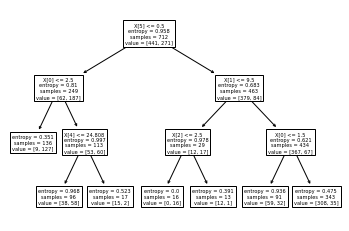

In [53]:
# Pruned tree
tree.plot_tree(new_model_tuning)